**Корректность проверена на Python 3.7:**
+ scipy 1.1.0
+ numpy 1.14.5

# Биномиальный критерий для доли

In [2]:
import numpy as np
from scipy import stats

In [3]:
import scipy
print(np.__version__)
print(scipy.__version__)

1.16.2
1.2.1


In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Shaken, not stirred

Джеймс Бонд говорит, что предпочитает мартини взболтанным, но не смешанным. Проведём слепой тест (blind test): $n$ раз предложим ему пару напитков и выясним, какой из двух он предпочитает. Получаем: 
* **выборка:** бинарный вектор длины $n$, где 1 — Джеймс Бонд предпочел взболтанный напиток, 0 — смешанный;
* **гипотеза $H_0$:** Джеймс Бонд не различает 2 вида напитков и выбирает наугад;
* **статистика $T$:** количество единиц в выборке.

Если нулевая гипотеза справедлива и Джеймс Бонд действительно выбирает наугад, то мы можем с одинаковой вероятностью получить любой из $2^n$ бинарных векторов длины $n$. 

Мы могли бы перебрать все такие векторы, посчитать на каждом значение статистики $T$ и получить таким образом её нулевое распределение. Но в данном случае этот этап можно пропустить: мы имеем дело с выборкой, состоящей из 0 и 1, то есть, из распределения Бернулли $Ber(p)$. Нулевая гипотеза выбора наугад соответствует значению $p=\frac1{2}$, то есть, в каждом эксперименте вероятность выбора взболтанного мартини равна $\frac1{2}$. Сумма $n$ одинаково распределённых бернуллиевских случайных величин с параметром $p$ имеет биномиальное распределение $Bin(n, p)$. Следовательно, нулевое распределение статистики $T$ — $Bin\left(n, \frac1{2}\right)$.

Пусть $n=16.$

In [5]:
n = 16
F_H0 = stats.binom(n, 0.5)

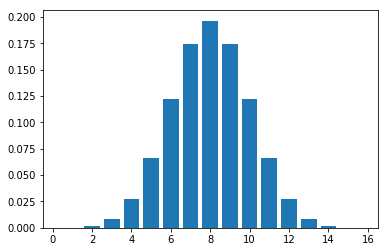

In [6]:
x = np.linspace(0,16,17)

pylab.bar(x, F_H0.pmf(x), align = 'center')
xlim(-0.5, 16.5) 
pylab.show()

## Односторонняя альтернатива

**гипотеза $H_1$:** Джеймс Бонд предпочитает взболтанный мартини.

При такой альтернативе более вероятны большие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом хвосте распределения.

In [7]:
F_H0.pmf(x)

array([1.52587891e-05, 2.44140625e-04, 1.83105469e-03, 8.54492188e-03,
       2.77709961e-02, 6.66503906e-02, 1.22192383e-01, 1.74560547e-01,
       1.96380615e-01, 1.74560547e-01, 1.22192383e-01, 6.66503906e-02,
       2.77709961e-02, 8.54492188e-03, 1.83105469e-03, 2.44140625e-04,
       1.52587891e-05])

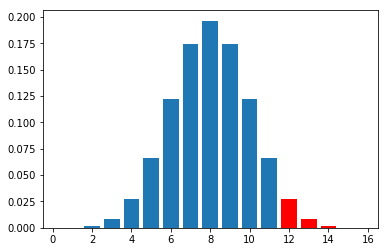

In [8]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(12,16,5), F_H0.pmf(np.linspace(12,16,5)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [9]:
stats.binom_test(15, 23, 0.5, alternative = 'greater') 
# Это точный двусторонний/односторонний тест нулевой гипотезы о том, что вероятность успеха в эксперименте Бернулли равна p

0.10501980781555172

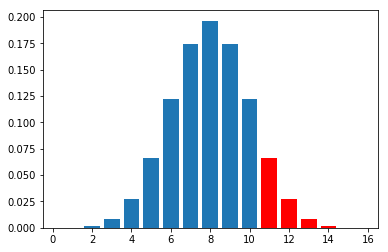

In [10]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(11,16,6), F_H0.pmf(np.linspace(11,16,6)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [15]:
stats.binom_test(11, 16, 0.5, alternative = 'greater')

0.10505676269531246

## Двусторонняя альтернатива

**гипотеза $H_1$:** Джеймс Бонд предпочитает какой-то определённый вид мартини.

При такой альтернативе более вероятны очень большие и очень маленькие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом и левом хвостах распределения.

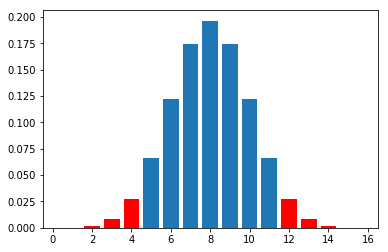

In [19]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(12,16,5), F_H0.pmf(np.linspace(12,16,5)), align = 'center', color='red')
pylab.bar(np.linspace(0,4,5), F_H0.pmf(np.linspace(0,4,5)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [20]:
stats.binom_test(12, 16, 0.5, alternative = 'two-sided')

0.076812744140625

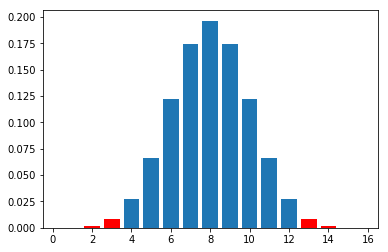

In [21]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(13,16,4), F_H0.pmf(np.linspace(13,16,4)), align = 'center', color='red')
pylab.bar(np.linspace(0,3,4), F_H0.pmf(np.linspace(0,3,4)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [22]:
stats.binom_test(13, 16, 0.5, alternative = 'two-sided')

0.021270751953125

**По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.**

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки

In [25]:
np.linspace(0,100,101)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [76]:
m = 100
F_H01 = stats.binom(m, 0.75)

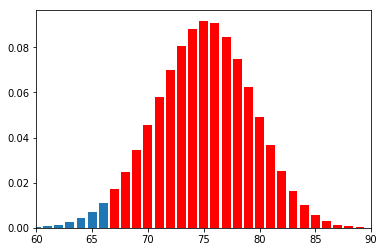

In [79]:
t = np.linspace(0,100,101)
pylab.bar(t, F_H01.pmf(t), align = 'center')
pylab.bar(np.linspace(67,100,34), F_H01.pmf(np.linspace(67,100,34)), align = 'center', color='red')
pylab.bar(np.linspace(0,33,34), F_H01.pmf(np.linspace(0,33,34)), align = 'center', color='red')
xlim(60, 90) 
pylab.show()

In [84]:
stats.binom_test(67, 100, 0.75, alternative = 'two-sided') 
# гипотиза 0,75 недовольных не отвеграется

0.08222258891386608

**Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты**

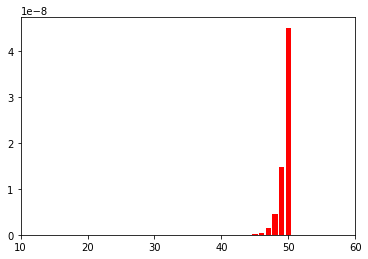

In [81]:
t = np.linspace(0,50,51)
pylab.bar(t, F_H01.pmf(t), align = 'center')
pylab.bar(np.linspace(22,50,29), F_H01.pmf(np.linspace(22,50,29)), align = 'center', color='red')
pylab.bar(np.linspace(0,28,29), F_H01.pmf(np.linspace(0,28,29)), align = 'center', color='red')
xlim(10, 60) 
pylab.show()

In [85]:
stats.binom_test(22, 50, 0.75, alternative = 'two-sided') 
# отвеграяется??

3.4831478978300243e-06

**The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).**

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [86]:
import pandas as pd

In [91]:
pines=pd.read_csv('pines.txt',sep='\t')

In [92]:
pines.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [99]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

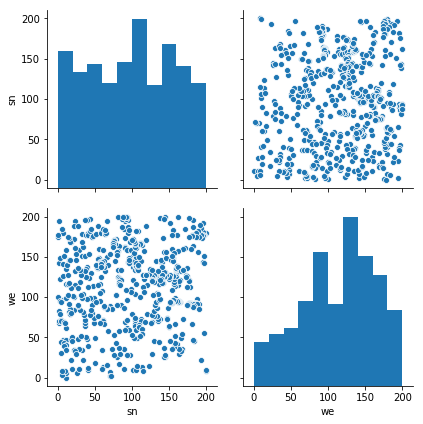

In [101]:
sns.pairplot(pines,size=3)
# уже видна неравномерность.

In [106]:
bins=scipy.stats.binned_statistic_2d (x=pines.sn, y=pines.we, values=None, statistic='count', bins=[5,5], range=None, expand_binnumbers=False)

In [107]:
bins.statistic

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [111]:
sum(bins.statistic)/25


23.36

**Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки**

In [108]:
from scipy import stats

In [109]:
bins.statistic.flatten()
# в один список. далее сравним с норм распределением 

array([18., 26., 29., 25., 20., 14., 12., 22., 34., 25., 12., 24., 15.,
       50., 37.,  8., 19., 31., 50.,  7.,  7.,  8., 37., 27., 27.])

In [124]:
stats.chisquare(bins.statistic.flatten(),sum(bins.statistic)/25, ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)